# UTS Deep Learning and Optimization
## Case: Fruit Recognition
---
Nama: Felicia Ferren

NIM: 2440013071

OneDrive link: https://binusianorg-my.sharepoint.com/personal/felicia_ferren_binus_ac_id/_layouts/15/guestaccess.aspx?docid=0aebefda5362a44fb81e01eadf2689caa&authkey=ASkP9rNQKYgBySfnGx83WbI&e=aBCNmW 

Alternate link: https://youtu.be/d35QAiASvXI 

## Case II: Fruit Recognition

### About Dataset

#### Dataset
> Total number of images: 22495.
> 
> Training set size: 16854 images (one fruit or vegetable per image).
> 
> Test set size: 5641 images (one fruit or vegetable per image).
>
> Number of classes: 33 (fruits and vegetables).
> 
> Image size: 100x100 pixels.
> 
> Training data filename format: [fruit/vegetable name][id].jpg (e.g. Apple Braeburn100.jpg). Many images are also rotated, to help training.
> 
> Testing data filename format: [4 digit id].jpg (e.g. 0001.jpg)
>

#### Content
> train - the training folder that contains 33 subfolders in which training images for each fruit/vegetable are located. There is a total of 16854 images.
>
> test - the testing folder that contains 5641 testing images
sampleSubmission.csv - a sample submission file in the correct format, with id number and string label
>

#### Acknowledgements
> TJ NMLO Public Dataset
>

### Import from Kaggle

first thing first, we will import drive to access kaggle.json file, in order to be able to import data from kaggle using API Token.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# set up to import dataset from kaggle
! pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json # from my google drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import dataset from kaggle
!kaggle datasets download -d sshikamaru/fruit-recognition

 98% 100M/102M [00:06<00:00, 21.5MB/s] 
100% 102M/102M [00:06<00:00, 17.2MB/s]


Then, import the specific dataset and unzip the dataset.

In [ ]:
!unzip fruit-recognition.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/train/Pepper Green/Pepper Green_264.jpg  
  inflating: train/train/Pepper Green/Pepper Green_265.jpg  
  inflating: train/train/Pepper Green/Pepper Green_266.jpg  
  inflating: train/train/Pepper Green/Pepper Green_267.jpg  
  inflating: train/train/Pepper Green/Pepper Green_268.jpg  
  inflating: train/train/Pepper Green/Pepper Green_269.jpg  
  inflating: train/train/Pepper Green/Pepper Green_27.jpg  
  inflating: train/train/Pepper Green/Pepper Green_270.jpg  
  inflating: train/train/Pepper Green/Pepper Green_271.jpg  
  inflating: train/train/Pepper Green/Pepper Green_272.jpg  
  inflating: train/train/Pepper Green/Pepper Green_273.jpg  
  inflating: train/train/Pepper Green/Pepper Green_274.jpg  
  inflating: train/train/Pepper Green/Pepper Green_275.jpg  
  inflating: train/train/Pepper Green/Pepper Green_276.jpg  
  inflating: train/train/Pepper Green/Pepper Green_277.jpg  
  inflating: train/train/Pepper Gre

Now, we have our dataset inside colab!

### Data Preparation

consist of data loading, data transformation, and data splitting and batching process.

#### Data Loading

import libraries needed and do seeding so the notebook gives stable output across runs.

In [ ]:
# import libraries
import os
import torch
import torchvision
import tarfile
import matplotlib
import matplotlib.pyplot as plt
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torch import nn
import torch.nn.functional as F

In [ ]:
# seeding, to make this notebook output stable across runs 
def seed_everything(seed: int):
    import random, os
    import numpy as np
    import torch
    
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(42)

then, define train and test file path (referring to directory path in colab). then, try to see the class for the images.

In [ ]:
# see the train folder
import pathlib

# create train and test path
train_path = './train/train/'
test_path = './test/'

# collect the classes of the data
root = pathlib.Path(train_path)
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])

# print the name of the classes and the total classes
print(classes)
print(len(classes))

train_data = os.listdir(train_path)

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
33


there are 33 classes of images, with the class name mentioned in the result.

then, we want to see the total images of each class... so create a dictionary to hold the count, and count the total images for each class

In [ ]:
# create a dictionary to hold the count
train_image_count = {}
for item in train_data:
    train_image_count[item] = 0
train_image_count

{'Peach': 0,
 'Pear': 0,
 'Apricot': 0,
 'Cucumber Ripe': 0,
 'Mango': 0,
 'Pineapple': 0,
 'Pepper Green': 0,
 'Cherry': 0,
 'Tomato': 0,
 'Blueberry': 0,
 'Pomegranate': 0,
 'Banana': 0,
 'Pepper Red': 0,
 'Cantaloupe': 0,
 'Onion White': 0,
 'Lemon': 0,
 'Watermelon': 0,
 'Limes': 0,
 'Apple Granny Smith': 0,
 'Strawberry': 0,
 'Passion Fruit': 0,
 'Corn': 0,
 'Orange': 0,
 'Raspberry': 0,
 'Grape Blue': 0,
 'Potato Red': 0,
 'Avocado': 0,
 'Papaya': 0,
 'Cactus fruit': 0,
 'Apple Braeburn': 0,
 'Clementine': 0,
 'Plum': 0,
 'Kiwi': 0}

In [ ]:
# now let us find the count
for item in train_data:
    train_image_count[item] = len( os.listdir('./train/train/'+item))
    #print(train_image_count[item])

In [ ]:
train_image_count

{'Peach': 492,
 'Pear': 696,
 'Apricot': 492,
 'Cucumber Ripe': 392,
 'Mango': 490,
 'Pineapple': 490,
 'Pepper Green': 444,
 'Cherry': 492,
 'Tomato': 738,
 'Blueberry': 462,
 'Pomegranate': 492,
 'Banana': 490,
 'Pepper Red': 666,
 'Cantaloupe': 492,
 'Onion White': 438,
 'Lemon': 492,
 'Watermelon': 475,
 'Limes': 490,
 'Apple Granny Smith': 492,
 'Strawberry': 492,
 'Passion Fruit': 490,
 'Corn': 450,
 'Orange': 479,
 'Raspberry': 490,
 'Grape Blue': 984,
 'Potato Red': 450,
 'Avocado': 427,
 'Papaya': 492,
 'Cactus fruit': 490,
 'Apple Braeburn': 492,
 'Clementine': 490,
 'Plum': 447,
 'Kiwi': 466}

visualize with bar plot for better observation.

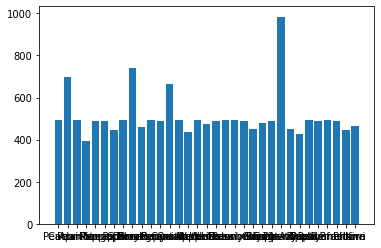

In [ ]:
# visualize the train image count using barplot
plt.bar(list(train_image_count.keys()), train_image_count.values())
plt.show()

from the plot above, we can tell that there are four classes which is more dominant than other classes while the others has similar total counts. we wont classify this as imbalance case.

#### Data Transformation (Pre-Processing)

in this section, we will load the image data using image loader and transforming the data with several process

The transform process consists of resizing into 32x32 pixel, random flip horizontally the image, format into tensor data type, and normalize the tensor.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms

In [ ]:
# load image folder and transform into -- train data
train_transforms = transforms.Compose([
    transforms.Resize((32, 32)), # resize into 32x32 px
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(), # change data type to Tensor
    transforms.RandomErasing(p=0.3, inplace=True), # erase some part of the images
    transforms.Normalize( # normalization
        mean=(0.5, 0.5, 0.5),
        std=(0.5, 0.5, 0.5))])

fruit_train = ImageFolder(train_path, transform=train_transforms)
print('Size of training dataset :', len(fruit_train))

Size of training dataset : 16854


after loading the data using image loader, we will get the batches of image.

let's have a look at the tensor size and how the tensor looks like.

In [ ]:
# view the tensor shape and how it looks like
img, label = fruit_train[0]
print(img.shape, label)
img,fruit_train.classes[label]

torch.Size([3, 32, 32]) 0


(tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 1.0000],
          ...,
          [1.0000, 0.9843, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
          [0.9922, 1.0000, 1.0000,  ..., 0.9922, 0.9843, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [1.0000, 1.0000, 1.0000,  ..., 0.9922, 0.9922, 1.0000],
          [1.0000, 0.9922, 0.9922,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],
 
         [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000,  ...,

yes, the size is already as what as we want, which is 32 x 32 x 3.

then, let's have a look on an example for an image after loaded.

In [ ]:
def show_example(img, label):
    print('Label: ', fruit_train.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  Apple Braeburn (0)


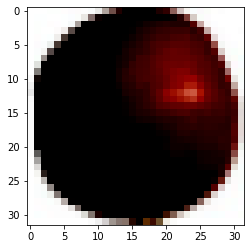

In [ ]:
show_example(*fruit_train[0])

Label:  Watermelon (32)


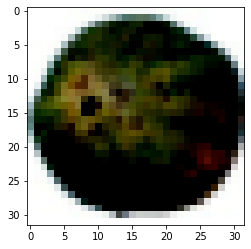

In [ ]:
show_example(*fruit_train[16853])

#### Data Splitting and Batching (Pre-Processing)

now, we will begin splitting the data. the train data will be split into train and validation data with 70:30 ratio. by using random_split function, we have to define the number of split data for train and validation data.

In [ ]:
# train 70; val 30
val_size = int(0.3 * len(fruit_train))
train_size = len(fruit_train) - val_size

In [ ]:
# splitting train data into 70% train and 30% validation data
train_ds, val_ds = random_split(fruit_train, [train_size, val_size])
len(train_ds), len(val_ds)

(11798, 5056)

from the result above, we can see that the number of sample for train data is 11798 observation, while there is 5056 number of samble on validation data.

next, load the test data into image loader and transform. the transformation process is the same as the one for training data.

In [ ]:
fruit_test = ImageFolder(test_path, transform=transforms.Compose([
                              transforms.Resize((32, 32)), # resize into 32x32 px
                              transforms.RandomHorizontalFlip(),
                              transforms.ToTensor(), # change data type to Tensor
                              transforms.Normalize( # normalization
                                  mean=(0.5, 0.5, 0.5),
                                  std=(0.5, 0.5, 0.5))]))
print('Size of test dataset :', len(fruit_test))

Size of test dataset : 5641


we see that the test dataset have 5641 number of sample. the size of valid and test dataset are at the similar amount which is good.

then, continue with loading the data into data loader for batching process... we will use 16 batch size for the train set, and 32 batch size for the validation and test set.

In [ ]:
# create data loader, with batch_size = 16 for train data and 32 for validation and test data
from torch.utils.data.dataloader import DataLoader

batch_size = 16
trainloader = DataLoader(train_ds, batch_size, shuffle=True, drop_last = True)
valloader = DataLoader(val_ds, batch_size*2, drop_last = True)
testloader = DataLoader(fruit_test, batch_size*2, drop_last = True)
# to counter error when applying batch normalization in architecture modification, use drop_last = True on dataloader
# The drop_last=True parameter ignores the last batch (when the number of examples in your dataset is not divisible by your batch_size)

let's see the batches of image from the dataset for train and test data.

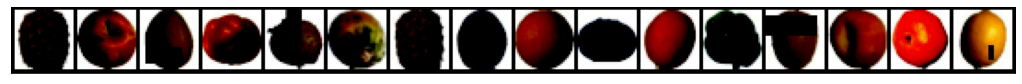

In [ ]:
# view batches of images from the dataset
from torchvision.utils import make_grid

for images, labels in trainloader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

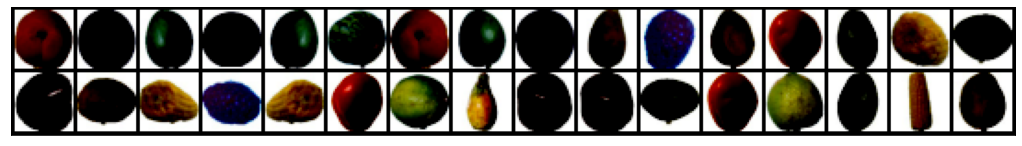

In [ ]:
# view batches of images from the dataset
from torchvision.utils import make_grid

for images, labels in testloader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

### Modelling

now, we will continue to the modelling process which consists of training, validation, and hyperparameter tuning & architecture modification process.

#### Training

start building our baseline model. there, we put 3 as our input feature because our image has RGB which means there are 3 features (red-green-blue). then, we follow the suggested architecture of CNN with two convulutional layer + ReLu, one convulutional layer, 2 FC, and softmax with num_classes = 33.

we will use 2 strides and 5 padding (the calculation for size flow can be seen at the comment of the code). 


In [ ]:
# architecture
# size of the input is 32x32x3
# suggested architecture of your CNN is as follows: 
# Conv (16.3x3), Relu, Conv (32.3x3), Relu, Conv (64.3x3), 2FC, and Softmax (number_class). 

class Net(nn.Module): # Define the model class.
  def __init__(self, num_classes = 33): # initialization
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, 2, 5) # 3-RGB, 16-featuremap, 3-kernel size, 2-stride, 5-padding
    self.conv2 = nn.Conv2d(16, 32, 3, 2, 5) # 16-fm, 32-featuremap next, 3-kernel size, 2-stride, 5-padding
    self.conv3 = nn.Conv2d(32, 64, 3, 2, 5) # 32-fm, 64-featuremap next, 3-kernel size, 2-stride, 5-padding

    self.fc1 = nn.Linear(64 * 11 * 11, 2048) # 64 * 11 * 11 px 
    self.fc2 = nn.Linear(2048, 1024) 
    self.fc3 = nn.Linear(1024, 33) # 33 is the number of class in the target variable

  def forward(self, x):
    # input sz: 32x32x3                 memory: 32*32*3 = 3072  
    x = F.relu(self.conv1(x))       # conv3-16 + relu  memory: 20*20*16 = 6400    size = (32 + 2*5 - 3)/2 + 1 = 39/2 + 1 = 20
    x = F.relu(self.conv2(x))       # conv3-32 + relu  memory: 14*14*32 = 6272    size = (20 + 2*5 - 3)/2 + 1 = 27/2 + 1 = 14
    x = self.conv3(x)               # conv3-64         memory: 11*11*64 = 7744    size = (14 + 2*5 - 3)/2 + 1 = 10/2 1 = 11    
    
    x = x.view(-1,int(x.nelement() / x.shape[0])) # x.view(x.size(0), -1) # 2D mnjd vector 1D
    
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    return x


device = ('cuda' if torch.cuda.is_available() else 'cpu') #Use a GPU if it’s available.
model = Net(num_classes = 33).to(device) #Create the model and move it to a GPU (if available).

after defining the architecture and instantiating the model, we will use cross entropy as our criterion to find loss, and use Stochastic Gradient Descent (SGD) as our optimizer, with 0.001 learning rate and 0.9 momentum.

In [ ]:
from torch import optim
from torch import nn
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

we will see the training loss for 10 epoch.

In [ ]:
N_EPOCHS = 10

for epoch in range(N_EPOCHS): # Outer training loop; loop over 10 epochs.
  epoch_loss = 0.0
  for inputs, labels in trainloader:
    inputs = inputs.to(device) # Move inputs and labels to GPU if available.
    labels = labels.to(device) # Move labels and labels to GPU if available.
    
    optimizer.zero_grad() # Zero out gradients before each backpropagation pass, or they’ll accumulate.
    
    outputs = model(inputs) # Perform forward pass.
    loss = criterion(outputs, labels) # Compute loss.
    loss.backward() # Perform backpropagation; compute gradients.
    optimizer.step() # Adjust parameters based on gradients.
    epoch_loss += loss.item() # Accumulate batch loss so we can average over the epoch.

  print("Epoch: {} Loss: {}".format(epoch, epoch_loss/len(trainloader)))

Epoch: 0 Loss: 3.439943706649615
Epoch: 1 Loss: 1.874557784729444
Epoch: 2 Loss: 0.7927026907778174
Epoch: 3 Loss: 0.540957443517212
Epoch: 4 Loss: 0.38678134165026923
Epoch: 5 Loss: 0.2725225088402649
Epoch: 6 Loss: 0.20821100254915909
Epoch: 7 Loss: 0.17223533808321312
Epoch: 8 Loss: 0.15428272395500892
Epoch: 9 Loss: 0.10930453043360279


from the result above, we can tell that the model works well for the training data where the loss value keeps going down over epoch.

#### Validation

now, we will do training process on training dataset and evaluation on validation dataset. this time, we will see the training and validation loss, also the accuracy for each epoch. the epoch we use is 10.

In [ ]:
from torch import optim
from torch import nn
model = Net(num_classes = 33).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9) # optim.Adam(model.parameters(), lr=0.001)

In [ ]:
N_EPOCHS = 10

best_accuracy = 0.0

for epoch in range(N_EPOCHS):
  # Evaluation and Training on Training Dataset
  train_accuracy = 0.0
  train_loss = 0.0
  model.train()

  for i, (inputs, labels) in enumerate(trainloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    optimizer.zero_grad() # set gradients to zero, so the gradients doesn't accumulate
    
    outputs = model(inputs) # give prediction // forward pass
    loss = criterion(outputs, labels) # compute loss
    loss.backward() # back propagation
    optimizer.step() # update weight and bias using the computed gradients

    train_loss += loss.cpu().data*inputs.size(0) # calculate train loss
    _, prediction = torch.max(outputs.data, 1) # calculate prediction

    train_accuracy += int(torch.sum(prediction==labels.data))
  
  train_accuracy = train_accuracy/len(train_ds)
  train_loss = train_loss/len(train_ds)

  # Validation
  val_accuracy = 0.0
  val_loss = 0.0
  model.eval()

  for i, (inputs, labels) in enumerate(valloader):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model(inputs) # give prediction // forward pass
      loss = criterion(outputs, labels) # compute loss
      val_loss += loss.cpu().data*inputs.size(0) # calculate train loss
      _, prediction = torch.max(outputs.data, 1) # calculate prediction

      val_accuracy += int(torch.sum(prediction==labels.data))

      loss = criterion(outputs, labels)
      val_loss += loss.item()

  val_accuracy = val_accuracy/len(val_ds)
  val_loss = val_loss/len(val_ds)

  print("Epoch: {} Train Loss: {} Train Accuracy: {} Val Loss: {} Val Accuracy: {}".format(epoch, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch: 0 Train Loss: 3.451564311981201 Train Accuracy: 0.06399389727072385 Val Loss: 3.2958617210388184 Val Accuracy: 0.0959256329113924
Epoch: 1 Train Loss: 2.1143195629119873 Train Accuracy: 0.3521783353110697 Val Loss: 1.5039128065109253 Val Accuracy: 0.5625
Epoch: 2 Train Loss: 0.8338123559951782 Train Accuracy: 0.739193083573487 Val Loss: 0.5713207125663757 Val Accuracy: 0.8229825949367089
Epoch: 3 Train Loss: 0.4979546368122101 Train Accuracy: 0.8375148330225461 Val Loss: 0.4285622239112854 Val Accuracy: 0.8660996835443038
Epoch: 4 Train Loss: 0.38143327832221985 Train Accuracy: 0.8770130530598407 Val Loss: 0.4100753664970398 Val Accuracy: 0.8734177215189873
Epoch: 5 Train Loss: 0.28203970193862915 Train Accuracy: 0.9034582132564841 Val Loss: 0.27050936222076416 Val Accuracy: 0.9181170886075949
Epoch: 6 Train Loss: 0.22216930985450745 Train Accuracy: 0.926343448042041 Val Loss: 0.20123593509197235 Val Accuracy: 0.9378955696202531
Epoch: 7 Train Loss: 0.17536409199237823 Train Acc

the value of training loss and validation loss indicate whether the model is overfit or underfit. model is said to be overfit if the training loss is decreasing when the validation loss not.

from the result above, we can see that the training loss and validation loss kept decreasing over epoch. this means that the model is doing well on training and validation data. 

#### Hyperparameter Tuning and Architecture Modification

next, we will do hyperparameter tuning using optuna and architecture modification by adding dropout and batch normalization.

first, we have to install optuna. 

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 31.0 MB/s 
     |████████████████████████████████| 81 kB 10.7 MB/s 
     |████████████████████████████████| 209 kB 69.1 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 147 kB 72.3 MB/s 
     |████████████████████████████████| 112 kB 68.0 MB/s 
     |████████████████████████████████| 50 kB 8.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=06b94e0c44046267287b95d0c2404ea61fa100a75bfdbb63f6d2dfa3cd6a35e8
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


for the architecture modification, we will add dropout at before fully connected layer 3 from the baseline model. we also add batch normalization after fully connected layer 1 and fully connected layer 2. 

batch normalization is used to normalize the output of previous layers, impacting to make the learning more efficient. it is also can be used as regularization to avoid overfitting of the model.

dropout is used to prevent overfitting in the model. it randomly switching some percentage of neurons of the network, impacting on enhanced learning.

In [ ]:
# architecture modification using dropout, batch normalization

# architecture
# size of the input is 32x32x3
# suggested architecture of your CNN is as follows: 
# Conv (16.3x3), Relu, Conv (32.3x3), Relu, Conv (64.3x3), 2FC, and Softmax (number_class). 

class NetModif(nn.Module): # Define the model class.
  def __init__(self, num_classes = 33): # initialization
    super(NetModif, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3, 2, 5) # 3-RGB, 16-featuremap, 3-kernel size, 2-stride, 5-padding
    self.conv2 = nn.Conv2d(16, 32, 3, 2, 5) # 16-fm, 32-featuremap next, 3-kernel size, 2-stride, 5-padding
    self.conv3 = nn.Conv2d(32, 64, 3, 2, 5) # 32-fm, 64-featuremap next, 3-kernel size, 2-stride, 5-padding

    self.fc1 = nn.Linear(64 * 11 * 11, 2048) # 64 * 11 * 11 px 
    self.fc2 = nn.Linear(2048, 1024) 
    self.fc3 = nn.Linear(1024, 33) # 33 is the number of class in the target variable

    self.bn1 = nn.BatchNorm1d(2048)
    self.bn2 = nn.BatchNorm1d(1024)

    self.drop = nn.Dropout(0.50)

  def forward(self, x):
    # input sz: 32x32x3                 memory: 32*32*3 = 3072  
    x = F.relu(self.conv1(x))       # conv3-16 + relu  memory: 20*20*16 = 6400    size = (32 + 2*5 - 3)/2 + 1 = 39/2 + 1 = 20
    x = F.relu(self.conv2(x))       # conv3-32 + relu  memory: 14*14*32 = 6272    size = (20 + 2*5 - 3)/2 + 1 = 27/2 + 1 = 14
    x = self.conv3(x)               # conv3-64         memory: 11*11*64 = 7744    size = (14 + 2*5 - 3)/2 + 1 = 10/2 1 = 11    
    
    x = x.view(-1,int(x.nelement() / x.shape[0])) # x.view(x.size(0), -1) # 2D mnjd vector 1D
    
    x = self.fc1(x)
    x = self.bn1(x)
    x = self.fc2(x)
    x = self.bn2(x)
    x = self.drop(x)
    x = self.fc3(x)
    return x


device = ('cuda' if torch.cuda.is_available() else 'cpu') #Use a GPU if it’s available.
model2 = NetModif(num_classes = 33).to(device) #Create the model and move it to a GPU (if available).

then, in the hyperparameter tuning, we suggest:
- adam, adadelta, and adagrad for the optimizer
- 10^-5 until 10^-1 for the learning rate.
- 16 until 64 for batch size with step = 16.

In [ ]:
# hyperparameter tuning process
import optuna

def objective(trial):

    # Generate the model.
    model2 = NetModif(num_classes = 33).to(device)

    # Generate the optimizers.

    # try RMSprop and SGD
    '''
    optimizer_name = trial.suggest_categorical("optimizer", ["RMSprop", "SGD"])
    momentum = trial.suggest_float("momentum", 0.0, 1.0)
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr,momentum=momentum)
    '''
    #try Adam, AdaDelta adn Adagrad
    
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "Adadelta","Adagrad"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1,log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    batch_size=trial.suggest_int("batch_size", 16, 64,step=16)

    criterion=nn.CrossEntropyLoss()
    
    N_EPOCHS = 10
    # Training of the model.
    for epoch in range(N_EPOCHS):
        model2.train()
       
        for batch_idx, (images, labels) in enumerate(trainloader):
            # Limiting training images for faster epochs.
            #if batch_idx * BATCHSIZE >= N_TRAIN_EXAMPLES:
            #    break

            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

        # Validation of the model.
        model2.eval()
        correct = 0
        with torch.no_grad():
            for batch_idx, (images, labels) in enumerate(valloader):
                # Limiting validation images.
               # if batch_idx * BATCHSIZE >= N_VALID_EXAMPLES:
                #    break
                images, labels = images.to(device), labels.to(device)
                output = model2(images)
                # Get the index of the max log-probability.
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(labels.view_as(pred)).sum().item()

        accuracy = correct / len(valloader.dataset)

        trial.report(accuracy, epoch)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return accuracy

now, we do the hyperparameter tuning process and find out the best hyperparameter to use. the study is done within 10 trials.

In [ ]:
# create study object to maximize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-11-24 14:32:37,391] A new study created in memory with name: no-name-edd5fb13-8112-4304-82c4-54cdb63514b9
[I 2022-11-24 14:35:18,210] Trial 0 finished with value: 0.03283227848101266 and parameters: {'optimizer': 'Adagrad', 'lr': 0.0004903321127988614, 'batch_size': 32}. Best is trial 0 with value: 0.03283227848101266.
[I 2022-11-24 14:38:00,152] Trial 1 finished with value: 0.02531645569620253 and parameters: {'optimizer': 'Adam', 'lr': 0.0006798866505263887, 'batch_size': 48}. Best is trial 0 with value: 0.03283227848101266.
[I 2022-11-24 14:40:41,537] Trial 2 finished with value: 0.03639240506329114 and parameters: {'optimizer': 'Adam', 'lr': 2.2915392636233076e-05, 'batch_size': 64}. Best is trial 2 with value: 0.03639240506329114.
[I 2022-11-24 14:43:22,854] Trial 3 finished with value: 0.026503164556962024 and parameters: {'optimizer': 'Adagrad', 'lr': 0.06725255901887105, 'batch_size': 64}. Best is trial 2 with value: 0.03639240506329114.
[I 2022-11-24 14:46:06,055] Tria

Accuracy: 0.06052215189873418
Best hyperparameters: {'optimizer': 'Adam', 'lr': 0.005581693402079831, 'batch_size': 64}


so, the best accuracy we can got is 0.0605 or 6.05%, with Adam optimizer, 0.005581693402079831 learning rate, and 64 batch size as the hyperparameters. this low accuracy means that our model is not good enough :( 

we should try different modified architecture, but let's keep continue to train and validate model using those hyperparameters and see its loss and accuracy over 10 epoch.

before that, we will change the loader with batch size 64.

In [ ]:
trainloader64 = DataLoader(train_ds, 64, shuffle=True, drop_last = True)
valloader64 = DataLoader(val_ds, 64, drop_last = True)
testloader64 = DataLoader(fruit_test, 64, drop_last = True)

In [ ]:
from torch import optim
from torch import nn
model2 = NetModif(num_classes = 33).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(),
                      lr=0.005581693402079831) # nanti ini diganti ikutin dari yang hasil param di tuningnya

In [ ]:
N_EPOCHS = 10

best_accuracy = 0.0

for epoch in range(N_EPOCHS):
  # Evaluation and Training on Training Dataset
  train_accuracy = 0.0
  train_loss = 0.0
  model2.train()

  for i, (inputs, labels) in enumerate(trainloader64):
    inputs = inputs.to(device)
    labels = labels.to(device)
    
    optimizer.zero_grad() # set gradients to zero, so the gradients doesn't accumulate
    
    outputs = model2(inputs) # give prediction // forward pass
    loss = criterion(outputs, labels) # compute loss
    loss.backward() # back propagation
    optimizer.step() # update weight and bias using the computed gradients

    train_loss += loss.cpu().data*inputs.size(0) # calculate train loss
    _, prediction = torch.max(outputs.data, 1) # calculate prediction

    train_accuracy += int(torch.sum(prediction==labels.data))
  
  train_accuracy = train_accuracy/len(train_ds)
  train_loss = train_loss/len(train_ds)

  # Validation
  val_accuracy = 0.0
  val_loss = 0.0
  model2.eval()

  for i, (inputs, labels) in enumerate(valloader64):
      inputs = inputs.to(device)
      labels = labels.to(device)

      outputs = model2(inputs) # give prediction // forward pass
      loss = criterion(outputs, labels) # compute loss
      val_loss += loss.cpu().data*inputs.size(0) # calculate train loss
      _, prediction = torch.max(outputs.data, 1) # calculate prediction

      val_accuracy += int(torch.sum(prediction==labels.data))

      loss = criterion(outputs, labels)
      val_loss += loss.item()

  val_accuracy = val_accuracy/len(val_ds)
  val_loss = val_loss/len(val_ds)

  print("Epoch: {} Train Loss: {} Train Accuracy: {} Val Loss: {} Val Accuracy: {}".format(epoch, train_loss, train_accuracy, val_loss, val_accuracy))

Epoch: 0 Train Loss: 0.9457113146781921 Train Accuracy: 0.7179182912358026 Val Loss: 3.022566080093384 Val Accuracy: 0.45450949367088606
Epoch: 1 Train Loss: 0.3673439919948578 Train Accuracy: 0.8913375148330226 Val Loss: 0.33956918120384216 Val Accuracy: 0.9042721518987342
Epoch: 2 Train Loss: 0.26009151339530945 Train Accuracy: 0.9253263264960163 Val Loss: 0.44976213574409485 Val Accuracy: 0.8833069620253164
Epoch: 3 Train Loss: 0.15762197971343994 Train Accuracy: 0.9514324461773181 Val Loss: 0.10619262605905533 Val Accuracy: 0.9697389240506329
Epoch: 4 Train Loss: 0.1354699730873108 Train Accuracy: 0.9590608577725038 Val Loss: 0.27369225025177 Val Accuracy: 0.9299841772151899
Epoch: 5 Train Loss: 0.12352333962917328 Train Accuracy: 0.959738938803187 Val Loss: 0.29301270842552185 Val Accuracy: 0.9274129746835443
Epoch: 6 Train Loss: 0.1655428260564804 Train Accuracy: 0.9538057297847092 Val Loss: 0.2941285967826843 Val Accuracy: 0.9295886075949367
Epoch: 7 Train Loss: 0.09875900298357

from the result above, we can see that the train loss kept decreasing but not very well on validation loss. seems we can't handle the overfit with the hyperparameter tuning. however, the accuracy we got is still high. let's just see the evaluation on test data.

### Evaluation

now, we will evaluate our model using test data. let's see the accuracy from both model, compare them, and choose the best model.

In [ ]:
num_correct = 0.0
for x_test_batch, y_test_batch in testloader:
  model.eval() # Set the model to evaluation mode for testing.
  y_test_batch = y_test_batch.to(device)
  x_test_batch = x_test_batch.to(device)
  y_pred_batch = model(x_test_batch) # Predict the outcomes for each batch
  _, predicted = torch.max(y_pred_batch.data, 1) # Select the class index with the highest probability.
  num_correct += (predicted ==y_test_batch).float().sum() # Compare the prediction to the true label and count the number of correct predictions.
  
accuracy = num_correct/(len(testloader)*testloader.batch_size) # Compute the percentage of correct predictions (accuracy).
print(len(testloader))
print(len(testloader), testloader.batch_size)
print("Test Accuracy: {}".format(accuracy))



176
176 32
Test Accuracy: 0.0


In [ ]:
num_correct = 0.0
for x_test_batch, y_test_batch in testloader64:
  model2.eval() # Set the model to evaluation mode for testing.
  y_test_batch = y_test_batch.to(device)
  x_test_batch = x_test_batch.to(device)
  y_pred_batch = model2(x_test_batch) # Predict the outcomes for each batch
  _, predicted = torch.max(y_pred_batch.data, 1) # Select the class index with the highest probability.
  num_correct += (predicted ==y_test_batch).float().sum() # Compare the prediction to the true label and count the number of correct predictions.
  
accuracy = num_correct/(len(testloader64)*testloader64.batch_size) # Compute the percentage of correct predictions (accuracy).
print(len(testloader64))
print(len(testloader64), testloader64.batch_size)
print("Test Accuracy: {}".format(accuracy))



88
88 64
Test Accuracy: 0.03142755851149559


it is shown that we got 0.0% accuracy on the first model, while the test accuracy is better on the second model (tuned and modified model). however, 3.142% accuracy is super bad. our model can't distinguish the image in test data even from the baseline.

I suggest that we should change the model baseline*... we can do several ways to improve it:
- get more data or increasing the diversity on available dataset by employing data augmentation,
- add more layers to increases the model ability to learn, 
- change image size (not too small because it is hard to pick up distinctive features, but not too big because it increases computational resources),
- increase epochs (if you have a lot of data in the dataset) till reaching a point where the accuracy doesnt improve, 
- decrease colour channel,
- transfer learning. 

it is also possible to got low test accuracy because the test data contained big amount from few distinct class (uneven class). 

for now, we just **choose the second model** and save it.

> *notes: actually, i have tried changing the baseline a FEW times but the test accuracy is still only around 2%.... 

In [ ]:
# Saving complete model
# torch.save(model, "complete_model.pth")
torch.save(model2, "complete_model.pth")

In [ ]:
from google.colab import files
files.download("complete_model.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>